In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Social_Network_Ads.csv" )

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [6]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [10]:
X_test

,Age,EstimatedSalary
209,46,22000
280,59,88000
33,28,44000
210,48,96000
93,29,28000
...,...,...
246,35,50000
227,56,133000
369,54,26000
176,35,47000


In [11]:
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

In [12]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [16]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)



Accuracy: 0.8625
Precision: 0.9047619047619048
Recall: 0.6785714285714286
Error Rate: 0.13749999999999996


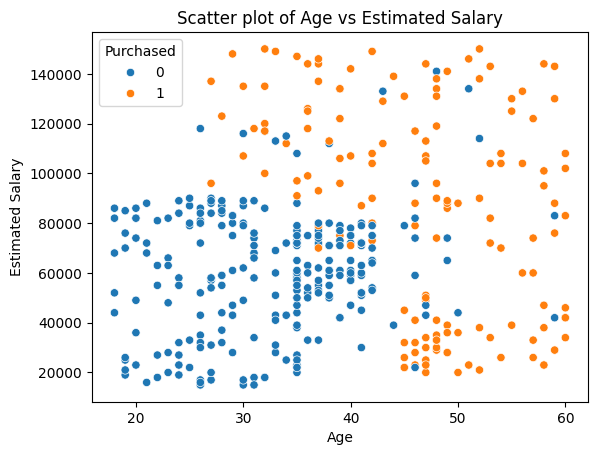

In [17]:
# Scatter plot
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')

plt.title('Scatter plot of Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()


In [18]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[50  2]
 [ 9 19]]


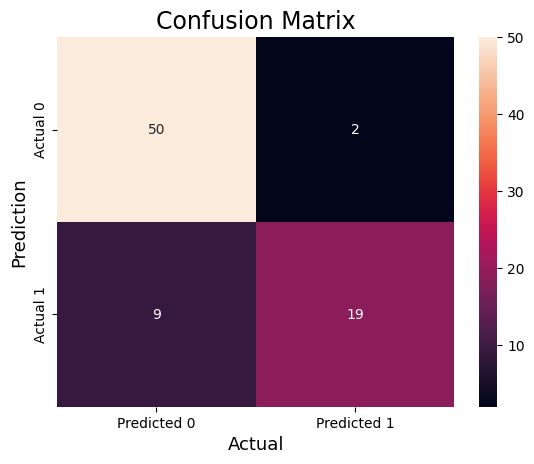

In [19]:
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Predicted 0','Predicted 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()